**CS_547 HW5**  
**Group 37**  
**Yue Cui**  
**Gaoyu Liu**   

Colab:  
https://colab.research.google.com/github/052D/CS547_SP2021/blob/main/HW5/CS547_HW5_Group37.ipynb?authuser=1

In [101]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d   

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 360

# Load Data

In [10]:
def getfile(location_pair,**kwargs): #tries to get local version and then defaults to google drive version
    (loc,gdrive)=location_pair
    try:
        out=pd.read_csv(loc,**kwargs)
    except FileNotFoundError:
        print("local file not found; accessing Google Drive")
        loc = 'https://drive.google.com/uc?export=download&id='+gdrive.split('/')[-2]
        out=pd.read_csv(loc,**kwargs)
    return out

In [30]:
fname = ("HW5_data.csv",
         "https://drive.google.com/file/d/1uvggKH43_gMdnAl8_AizPkQfqHkSFP7P/view?usp=sharing")

data_raw = getfile(fname,
                   index_col=0,
                   header=0,
                   #names = ['X', 'Y', 'Z'],
                   )
data_raw.columns = data_raw.columns.astype(str)
display(data_raw.head())

,X,Y,Z
0,7.324518,3.657837,1693.658572
1,7.838516,8.214597,46111.249973
2,7.149941,0.078071,806.812388
3,6.812724,9.404818,88997.210710
4,5.568275,9.288328,83263.340975


# Split Data

Since the `sklearn.model_selection.train_test_split` function only splits the data set into two portions in one function run, we need to apply this function **twice** to obtain the **training, validation, and testing** data set. We shuffled the raw data before spliting.  

The procedure is as follows:  

1 - Split the raw data into training & validation set and testing set with a ratio of **0.8:0.2**. 

2 - Split the **training & validation set** into training set and validation set with a ratio of **0.75:0.25**. 



In [43]:
from sklearn.model_selection import train_test_split
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

X_train_validation, X_test, y_train_validation, y_test = \
    train_test_split(data_raw.loc[:, ['X', 'Y']], data_raw.Z,
                     train_size=0.8,
                     random_state=4,
                     shuffle=True,
                     )

In [48]:
X_train, X_validation, y_train, y_validation = \
    train_test_split(X_train_validation, y_train_validation,
                     train_size=0.75,
                     random_state=4,
                     shuffle=True,
                     )

## Visualization

In [79]:
color_train="red"
color_validate="blue"
color_test="forestgreen"

### X-Y Plane

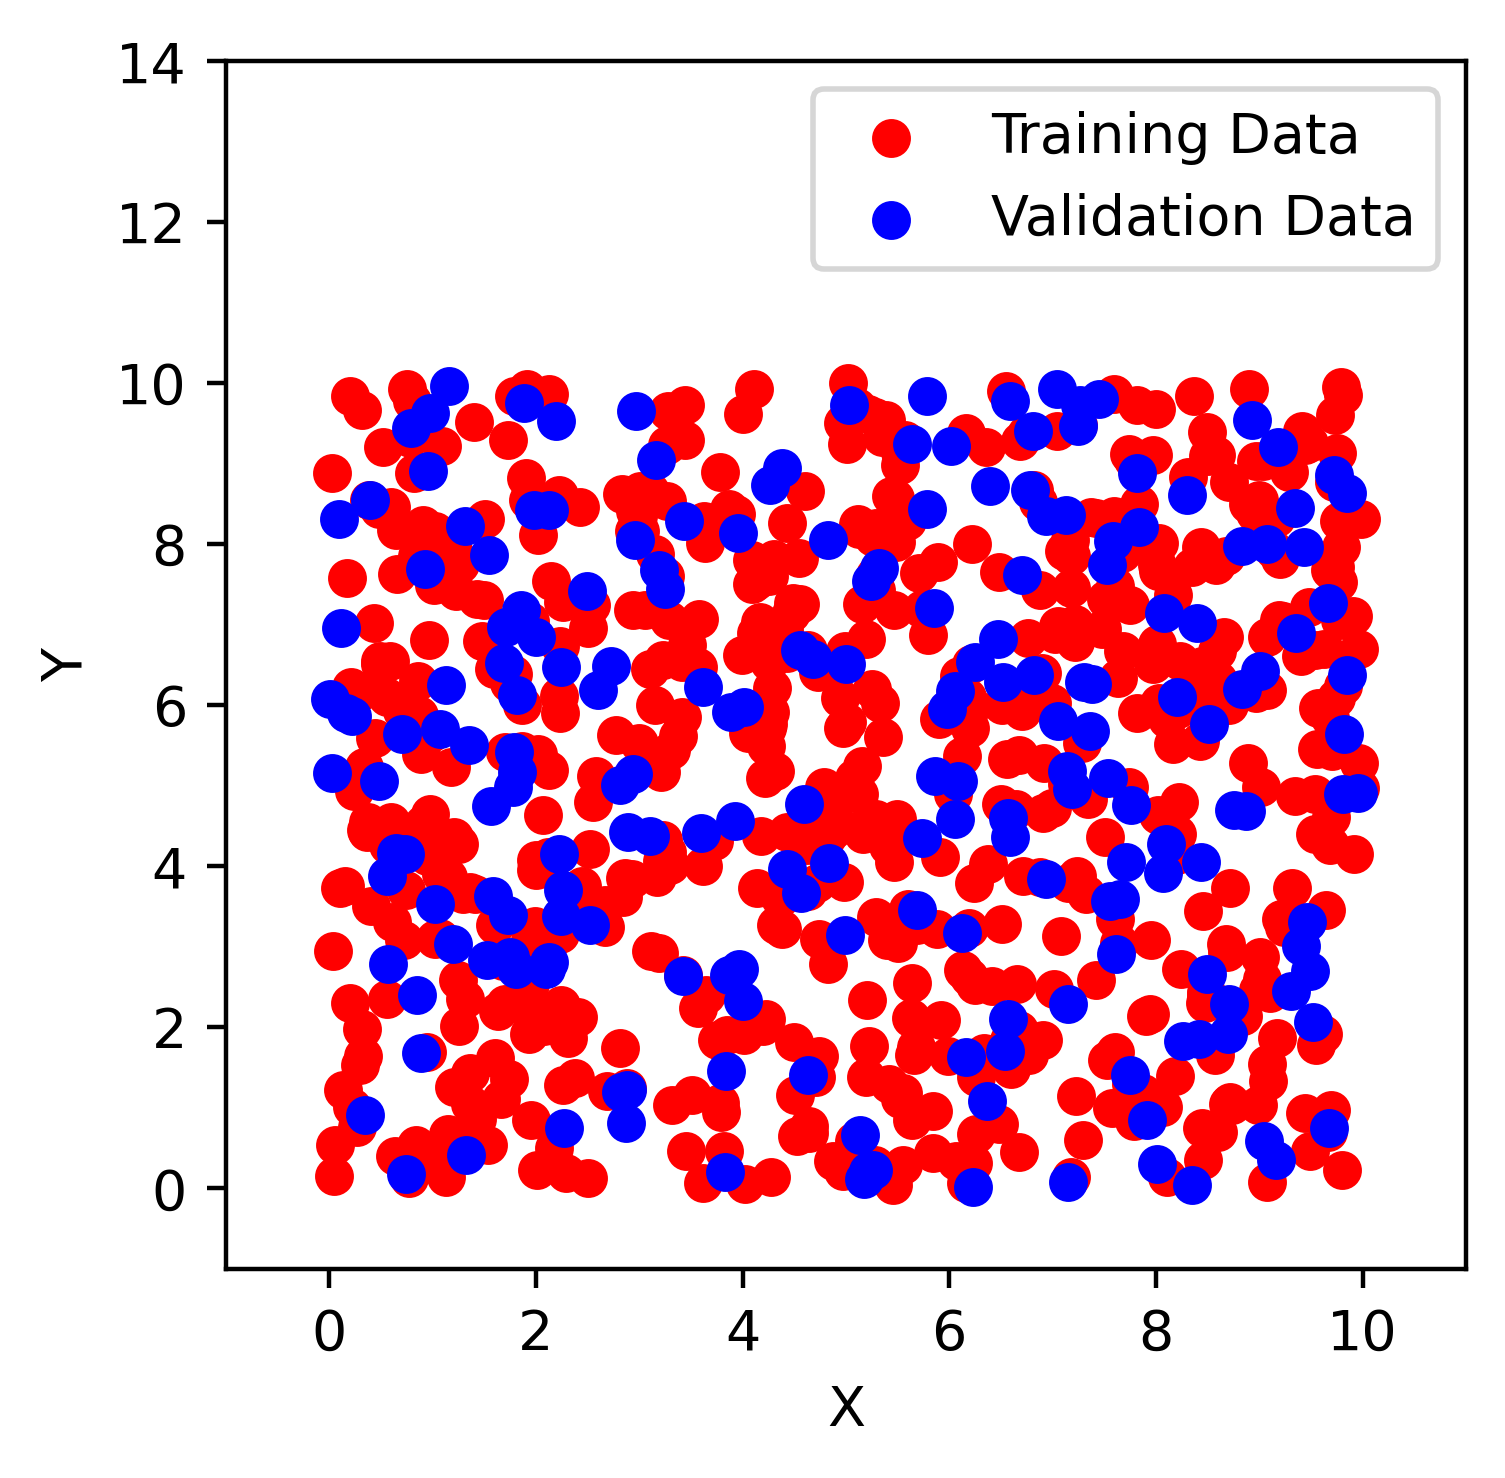

In [106]:
fig = plt.figure(figsize = (4,4),
                dpi = 400,)
ax = fig.add_subplot(111)

ax.scatter(X_train.X, X_train.Y,
           color=color_train,
           label='Training Data')

ax.scatter(X_validation.X, X_validation.Y,
           color=color_validate,
           label='Validation Data')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim((-1, 11))
ax.set_ylim((-1, 14))
ax.legend()

plt.show()

### 3D Plot

In [115]:
%matplotlib qt

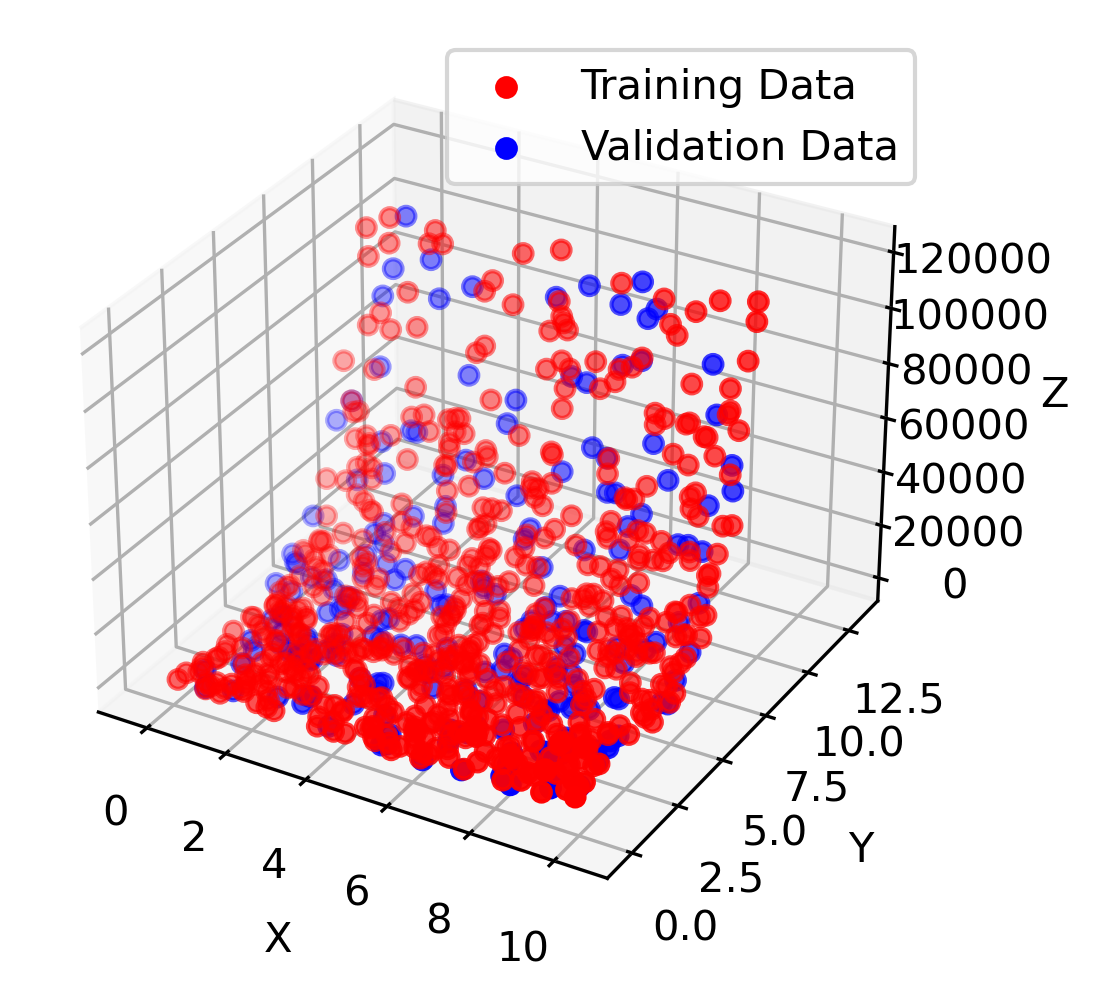

In [120]:
fig = plt.figure(figsize = (4,4),
                dpi = 300)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train.X, X_train.Y, y_train,
           color=color_train,
           label='Training Data')

ax.scatter(X_validation.X, X_validation.Y, y_validation,
           color=color_validate,
           label='Validation Data')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim((-1, 11))
ax.set_ylim((-1, 14))
ax.legend()

plt.show()

In [117]:
%matplotlib inline

In [84]:
X_train.X.min()

0.029726524923454626

In [49]:
display(X_train)
display(X_validation)

,X,Y
256,3.320874,1.038980
929,0.650417,8.171589
793,5.160851,5.243674
562,3.233965,4.322347
64,6.894785,6.395727
...,...,...
105,7.603164,1.693432
847,7.478038,6.940977
201,1.435993,0.608731
590,4.220529,5.093835


,X,Y
444,4.681379,6.572947
494,3.961103,2.727167
469,2.193494,9.523450
965,6.233487,0.016461
9,8.492650,2.666615
...,...,...
703,1.567642,4.745350
509,8.346381,0.037983
471,9.525379,2.064928
288,7.551433,3.568815


In [47]:
display(X_test)
display(y_test)

,X,Y
698,9.452281,9.275509
577,4.286103,7.971349
763,0.929669,5.317204
790,0.701414,3.048021
520,3.206474,9.176903
...,...,...
127,5.169126,9.352405
924,4.651242,0.523327
632,4.314529,6.364010
869,7.896560,5.589096


698    84976.987904
577    38715.563658
763     5099.358216
790      318.893209
520    78112.131139
           ...     
127    86080.311536
924      153.289492
632    12626.746087
869     7783.947403
11         9.513922
Name: Z, Length: 200, dtype: float64

# Polynomial Features

To consider all cases of  
$$
Z_n = \sum_{\alpha, \beta} c_{\alpha, \beta} X_n^{\alpha} Y_n^{\beta} 
$$
where  
$$
\alpha \ge 0, \ \beta \ge 0
$$

we use `sklearn.preprocessing.PolynomialFeatures` to generate all the polynomial features that meet the definition above. Intercept is **not** considered at this step.

In [59]:
from sklearn.preprocessing import PolynomialFeatures
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

D = [2, 3, 4, 5, 6, 7]
X_train_list = []
X_validation_list = []
X_test_list = []

for d in D:
    poly = PolynomialFeatures(degree=d,
                              include_bias=False,
                              )
    #
    X_train_list.append(poly.fit_transform(X_train))
    X_validation_list.append(poly.fit_transform(X_validation))
    X_test_list.append(poly.fit_transform(X_test))

del d

# Fit Linear Regression Model

Although the intercept term was not generated in the polynomial features, the intercept is considered when a linear regression model is fit using `sklearn.linear_model.LinearRegression`. 

The mean squares error (MSE) is computed using `sklearn.metrics.mean_squared_error`.

In [67]:
from sklearn.linear_model import LinearRegression
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.metrics import mean_squared_error
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

model_list = []
MSE_list = []
y_pred_vali_list = []

for i, X_ in enumerate(X_train_list):
    reg = LinearRegression(fit_intercept=True).fit(X_, y_train)
    model_list.append(reg)
    y_pred = reg.predict(X_validation_list[i])
    y_pred_vali_list.append(y_pred)
    MSE_list.append(mean_squared_error(y_pred, y_validation))

del reg, y_pred

print(f'The MSE for the validation data for each D is :')
display(MSE_list)

The MSE for the validation data for each D is :


[44646302.31144306,
 2227648.93544416,
 21986.58676800206,
 0.009140749817510223,
 0.00900454916883479,
 0.009458056160202753]

Find the best D among the candidates.

In [70]:
best_D_idx = np.array(MSE_list).argmin()
best_D = D[best_D_idx]

print(f'The best D that minimizes the MSE for the validation data is {best_D}.')

The best D that minimizes the MSE for the validation data is 6.


# Testing MSE

In [72]:
y_pred_test = model_list[best_D_idx].predict(X_test_list[best_D_idx])
MSE_test = mean_squared_error(y_pred_test, y_test)

In [73]:
MSE_test

0.008865060625077524

# Conclusions

## Best D

In [74]:
print(f'The best D that minimizes the MSE for the validation data is {best_D}.')

The best D that minimizes the MSE for the validation data is 6.


## MSEs

In [75]:
y_pred_train = model_list[best_D_idx].predict(X_train_list[best_D_idx])
MSE_train = mean_squared_error(y_pred_train, y_train)

print(f'The MSE for the training data associated with the best D {best_D} is {MSE_train}.')
print(f'The MSE for the validation data associated with the best D {best_D} is {MSE_list[best_D_idx]}.')
print(f'The MSE for the test data associated with the best D {best_D} is {MSE_test}.')

The MSE for the training data associated with the best D 6 is 0.008958792170790724.
The MSE for the validation data associated with the best D 6 is 0.00900454916883479.
The MSE for the test data associated with the best D 6 is 0.008865060625077524.


## Coefficients

In [76]:
model_list[best_D_idx].coef_

array([ 9.17863055e-01,  1.09404710e+00,  1.83405408e-01, -2.97444241e+00,
       -8.99002174e-02,  2.76423746e-02,  4.79899053e-01,  9.20634428e-03,
        3.17534329e-02,  2.92674486e-01,  2.98254449e-03,  8.75238503e-04,
       -2.10885004e-03, -5.78674182e-03,  7.64347201e-04, -1.36608838e-04,
       -2.91211153e-04,  2.38006298e-04,  5.81372708e-05,  1.20053487e+00,
       -2.85960047e-05,  2.58796724e-06,  7.32230331e-06,  6.32487088e-06,
       -1.65260227e-05,  4.43567395e-06, -1.93736506e-05])

In [77]:
model_list[best_D_idx].intercept_

5.041295091068605